<a href="https://colab.research.google.com/github/HosseinEetedadi/CCNA_Fianl_Project/blob/master/arzyabi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
class graph:
  
  def __init__(self,g):
    self.g = g



  def setCars(self):
    cars = ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G']
    present = {}
    np.random.seed(1)
    for name in cars:
      (low, high) = np.random.choice(range(1,7), 2, replace = False)
      present[name]=[low, high]
            
    return present
  
  def graph_Draw(self, edges, i, j):
    weight_dic = {}
    self.g.add_edges_from(edges)
    pos = nx.spring_layout(self.g)

    self.g[1][2]['weight'] = 10
    weight_dic[(1, 2)] = 10
    self.g[3][1]['weight'] = 30
    weight_dic[(3, 1)] = 30
    self.g[3][4]['weight'] = 2
    weight_dic[(3, 4)] = 2
    self.g[2][5]['weight'] = 30
    weight_dic[(2, 5)] = 30
    self.g[5][2]['weight'] = 30
    weight_dic[(5, 2)] = 30
    self.g[5][6]['weight'] = 5
    weight_dic[(5, 6)] = 5
    self.g[6][5]['weight'] = 5
    weight_dic[(6, 5)] = 5
    self.g[4][6]['weight'] = 40
    weight_dic[(4, 6)] = 40
    self.g[5][3]['weight'] = 45
    weight_dic[(5, 3)] = 45
    self.g[3][1]['weight'] = 30
    weight_dic[(3, 1)] = 30
    self.g[6][2]['weight'] = 20
    weight_dic[(6, 2)] = 20
    
    nx.draw_networkx_edge_labels(self.g, pos, {
        (1, 2) : 10,
        (2, 5) : 30,
        (5, 2) : 30,
        (5, 6) : 5,
        (6, 5) : 5,
        (4, 6) : 40,
        (3, 4) : 2,
        (5, 3) : 45,
        (3, 1) : 30,
        (6, 2) : 20
    }, label_pos = 0.50, )
    #nx.draw_networkx_nodes(self.g, pos)
    #nx.draw_networkx_edges(self.g, pos, edgelist = self.g.edges, edge_color = 'black')
   # nx.draw_networkx_labels(self.g, pos)
    nx.draw(self.g, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    
    plt.show()
    adj = nx.adjacency_matrix(self.g, weight = 'None')
    return adj.todense(), nx.shortest_path(self.g, source = i, target = j, method = "dijkstra"), weight_dic

  def calShortPath(self, routeMap):
    for route in routeMap:
      routeMap[route] = nx.shortest_path(self.g, source = routeMap[route][0], target = routeMap[route][1] )
    
    return routeMap

  def showEdges(self):
    return self.g.edges()

  def showLabel(self):
    graphTemp = self.g
    pos = nx.spring_layout(graphTemp)

    nx.draw_networkx_edge_labels(graphTemp, pos, {
        (1, 2) : 1,
        (2, 5) : 2,
        (5, 2) : 6,
        (5, 6) : 7,
        (6, 5) : 9,
        (4, 6) : 5,
        (3, 4) : 3,
        (5, 3) : 8,
        (3, 1) : 4,
        (6, 2) : 10
    }, label_pos = 0.75, )
    nx.draw(self.g, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    plt.show()
  
  def showRoute(self, route):
    graph = self.g
    pos = nx.spring_layout(graph)
    nx.draw_networkx_edge_labels(graph, pos, {
        (1, 2) : 10,
        (2, 5) : 30,
        (5, 2) : 30,
        (5, 6) : 5,
        (6, 5) : 5,
        (4, 6) : 40,
        (3, 4) : 2,
        (5, 3) : 45,
        (3, 1) : 30,
        (6, 2) : 20
    }, label_pos = 0.50, )
    nx.draw(graph, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_nodes(graph, pos, nodelist=route, node_color="tab:red")

    plt.show()

  def density(self, V, steady_state_value, weight_dic, start, end):
    r = 1 
    for key, value in weight_dic.items():
      if key == (start, end):
         r = value
         break
    route_lane_number = 1 
    density = (V * steady_state_value) / (route_lane_number * r)


    return density



  def tpm_maker(self, edges, car_count_matrix):
    car_count = {}
    edgesj = edges
    teransition = np.zeros((10, 10))

    for i, route_number in zip(edges.values(), edges.keys()):
      #car_count = 0 
      count = 0
      srci, disti = i[0], i[1]
      for j, element in zip(edges.values(), edgesj.keys()):
        srcj, distj = j[0], j[1]
        if disti == srcj:
          count += car_count_matrix[srci - 1][disti - 1] + car_count_matrix[srcj - 1][distj - 1]

      for j, element in zip(edges.values(), edgesj.keys()):
        srcj, distj = j[0], j[1]
        if disti == srcj:
          teransition[route_number - 1][element - 1] = (car_count_matrix[srci - 1][disti - 1] + car_count_matrix[srcj - 1][distj - 1]) / count
        else:
          teransition[route_number - 1][element - 1] = 0

         # car_count[(route_number, element)] = (car_count_matrix[srci - 1][disti - 1] + car_count_matrix[srcj - 1][distj - 1])
        #else:
         # car_count[(route_number, element)] = 0
      #for item in car_count.values():
      
    
      
    return teransition


  def modify_tpm(self, weghited_dic, transition_matrix):
    for key, value in weghited_dic.items():
      weghited_dic[key] = value / 60
    
    return weghited_dic
    


    
  def transition_matrix(self, routMap,nump_adjancy):
    
    rout_map_str = str(routMap)
    #print(nump_adj)
    teransition = np.zeros((6, 6))
    #print(nump_adjancy)
    #print("")
    #print('******************************************************')
    #print("Route Map")

    row = 1
    column = []
    for rows in nump_adjancy:
      if rows.sum() == 1:
        teransition[row - 1] = rows
      elif rows.sum() > 1:
          a = np.where(rows == 1)
          for index in a:
            column.append(index)
          index_pos = column.pop()
          for element in teransition:
            usage_count = 0
            for index in  index_pos:
              #print(f"{row}, {index + 1}")
              usage_count += rout_map_str.count(f"{row}, {index + 1}")
            for index in index_pos:
              teransition[row - 1][index] = ((rout_map_str.count(f"{row}, {index + 1}")))
              


      row += 1

    

    return teransition


  

In [ ]:
dic = {(1, 2):2, 3:4}
for key, value in dic.items():
  if key == (1, 2):
    dic[key] = value / 2
print(dic)

{(1, 2): 1.0, 3: 4}


Road network with length of road: 


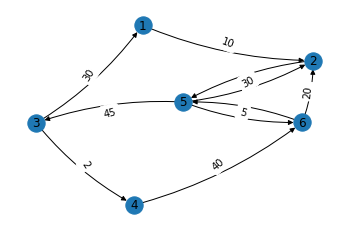

Adjacency matrix : 
[[0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 1 0 0 1]
 [0 1 0 0 1 0]]
Road network with label of road: 


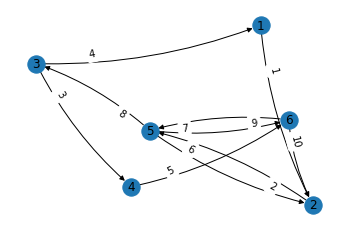

The shortest path of each car :  {'A': [3, 1, 2], 'B': [5, 3], 'C': [3, 1], 'D': [4, 6], 'E': [2, 5, 6], 'F': [4, 6], 'H': [3, 4, 6], 'G': [3, 4, 6, 5]}
Transition probability matrix is : 
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.2
  0.4        0.4        0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.66666667 0.33333333]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.66666667 0.33333333]
 [0.         0.         0.5        0.5        0.         0.
 

In [10]:
gr = nx.DiGraph()
g = graph(gr)
print('Road network with length of road: ')
(adj, shortPath, weghited_dic) = g.graph_Draw([(1, 2), (3, 4), (2, 5), (5, 2), (5, 6), (6, 5), (6, 2), (5, 3), (4, 6),  (3, 1)], 1, 6)

routMap = g.setCars()
print('Adjacency matrix : ')
print(adj)
nump_adj = np.array(adj.data)
#print(nump_adj)
print('Road network with label of road: ')
g.showLabel()

#print('***************************************************************')
#print(shortPath)
shorth_path = g.calShortPath(routMap)
print('The shortest path of each car : ',shorth_path)
#print('************************** TPM ********************************')

#print(g.transition_matrix(routMap, nump_adj))
p = g.transition_matrix(routMap, nump_adj)
#print('***************************************************************')

edges=[int(i) for i in str(g.showEdges()) if i.isdigit()]
edges = np.array_split(edges, 10)
j = 0
index = 1
dic = {}
#print(edges)
while j < (10):
  
  dic[index] = edges[j]
  j = j + 1
  index = index + 1
#print(dic)
print('Transition probability matrix is : ')
print( g.tpm_maker(dic, p))
tpm = g.tpm_maker(dic, p)
#print(g.modify_tpm(weghited_dic, 1))


#print(dic[1])
#for item in shorth_path.values():
#g.showRoute(item)

In [14]:
import scipy.linalg as sp
import math as mt
#calulate steaty state vector
def near(a, b, rtol = 1e-5, atol = 1e-8):
  return np.abs(a - b) < (atol + rtol * np.abs(b))

def steady_state(p):
  values, vectors = sp.eig(p, left = True, right = False)
  vectors = vectors.T
  vector = vectors[near(values, 1)]
  return vector/np.sum(vector)


cal = []
st = steady_state(tpm)
#print(steady_state(tpm))
#print(tpm)
'''print(mt.sqrt(st[0][0].real ** 2 + st[0][0].imag ** 2))  
print(mt.sqrt(st[0][1].real ** 2 + st[0][1].imag ** 2)) 
print(mt.sqrt(st[0][2].real ** 2 + st[0][2].imag ** 2))
print(mt.sqrt(st[0][3].real ** 2 + st[0][3].imag ** 2))
print(mt.sqrt(st[0][4].real ** 2 + st[0][4].imag ** 2))
print(mt.sqrt(st[0][5].real ** 2 + st[0][5].imag ** 2)) 
print(mt.sqrt(st[0][6].real ** 2 + st[0][6].imag ** 2))
print(mt.sqrt(st[0][7].real ** 2 + st[0][7].imag ** 2))
print(mt.sqrt(st[0][8].real ** 2 + st[0][8].imag ** 2))
print(mt.sqrt(st[0][9].real ** 2 + st[0][9].imag ** 2))'''
dens = {}
count = 0
for key, value in weghited_dic.items():
  dens[count + 1] = g.density(8, std[0][count].real ** 2 + std[0][count].imag ** 2 , weghited_dic, key[0], key[1])
  count += 1
print('The desification of each road is : ', dens)


The desification of each road is :  {1: 0.0035555555555555713, 2: 0.010666666666666665, 3: 0.017777777777777785, 4: 0.0011851851851851856, 5: 0.0011851851851851821, 6: 0.0071111111111111115, 7: 0.028444444444444394, 8: 0.0035555555555555557, 9: 0.0031604938271604893, 10: 0.0017777777777777798}


In [15]:
'''
rout_map_str = str(routMap)
#print(nump_adj)
teransition = np.zeros((6, 6))
print(nump_adj)
print("")
print('******************************************************')
print("Route Map")

row = 1
column = []
for rows in nump_adj:
  if rows.sum() == 1:
   
    teransition[row - 1] = rows
    

  elif rows.sum() > 1:
      a = np.where(rows == 1)
      for index in a:
        column.append(index)
      index_pos = column.pop()
      for element in teransition:
        usage_count = 0
        for index in  index_pos:
          #print(f"{row}, {index + 1}")
          usage_count += rout_map_str.count(f"{row}, {index + 1}")
        for index in index_pos:
          teransition[row - 1][index] = ((rout_map_str.count(f"{row}, {index + 1}")) / usage_count)
          


  row += 1

print(routMap)
print("")
print('******************************************************')
print("TPM:")

print(teransition)'''


'\nrout_map_str = str(routMap)\n#print(nump_adj)\nteransition = np.zeros((6, 6))\nprint(nump_adj)\nprint("")\nprint(\'******************************************************\')\nprint("Route Map")\n\nrow = 1\ncolumn = []\nfor rows in nump_adj:\n  if rows.sum() == 1:\n   \n    teransition[row - 1] = rows\n    \n\n  elif rows.sum() > 1:\n      a = np.where(rows == 1)\n      for index in a:\n        column.append(index)\n      index_pos = column.pop()\n      for element in teransition:\n        usage_count = 0\n        for index in  index_pos:\n          #print(f"{row}, {index + 1}")\n          usage_count += rout_map_str.count(f"{row}, {index + 1}")\n        for index in index_pos:\n          teransition[row - 1][index] = ((rout_map_str.count(f"{row}, {index + 1}")) / usage_count)\n          \n\n\n  row += 1\n\nprint(routMap)\nprint("")\nprint(\'******************************************************\')\nprint("TPM:")\n\nprint(teransition)'